In [110]:
# raytracing tutorial
# 06- experiment with additive light contributions
# and squashing into RGB range

In [111]:
import numpy
import matplotlib.pyplot as plt
import math

# plot images in this notebook
%matplotlib inline

In [112]:
# axes x to the right, y upwards. z into the screen (left hand rule)

In [113]:
# create image

image = numpy.zeros((40, 40, 3), dtype='float64')
print("image shape = ", image.shape)

image shape =  (40, 40, 3)


In [135]:
# main loop is to consider every pixel of the viewport

for pixel_ix in range(image.shape[0]):
    for pixel_iy in range(image.shape[1]):
        
        # combine lighting factors
        # sky light
        image[pixel_ix, pixel_iy] = [0.3, 0.3, 0.3]
        
        # circle
        if math.pow(pixel_ix - 20, 2) + math.pow(pixel_iy - 20, 2) <80:
            image[pixel_ix, pixel_iy] += [0.7, 0.0, 0.0]
            pass
        
        # highlight
        if math.pow(pixel_ix - 20, 2) + math.pow(pixel_iy - 20, 2) <20:
            image[pixel_ix, pixel_iy] += [0.8, 0.0, 0.0]
            pass
        
        # super highlight
        if math.pow(pixel_ix - 20, 2) + math.pow(pixel_iy - 20, 2) <8:
            image[pixel_ix, pixel_iy] += [99.0, 0.0, 0.0]
            pass
        
        # star
        if math.pow(pixel_ix - 30, 2) + math.pow(pixel_iy - 30, 2) <12:
            image[pixel_ix, pixel_iy] += [0.0, 0.0, 99.0]
            pass
        
        # star core
        if math.pow(pixel_ix - 30, 2) + math.pow(pixel_iy - 30, 2) <4:
            image[pixel_ix, pixel_iy] += [0.0, 99.0, 99.0]
            pass
        
        pass
    pass

In [136]:
# apply squashing function to image
# first shift data into range [0,1] asymptotically
# then remap to colour RGB range [0,255] dtype=uint8

# squash with tanh()
image = numpy.tanh(image)

In [137]:
# remap to RGB range
image_rgb = numpy.array(image*255, dtype='uint8')

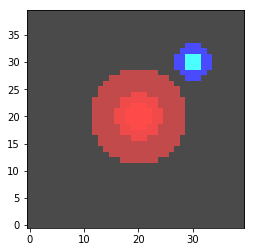

In [138]:
# transpose array so origin is bottom left, by swapping dimensions 0 and 1, but leave dimension 3

image_rgb2 = numpy.transpose(image_rgb, (1, 0, 2))
plt.imshow(image_rgb2, origin='lower')

In [118]:
#plt.imsave('test.png', image2, origin='lower')